In [7]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Remove duplicate edges
def dedup_edges(graph_dict):
    return {k: sorted(set(v)) for k, v in graph_dict.items()}


/var/folders/dk/6t0bvj8n45q61w7_l1c3tqn00000gn/T/ipykernel_93896/2915818167.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


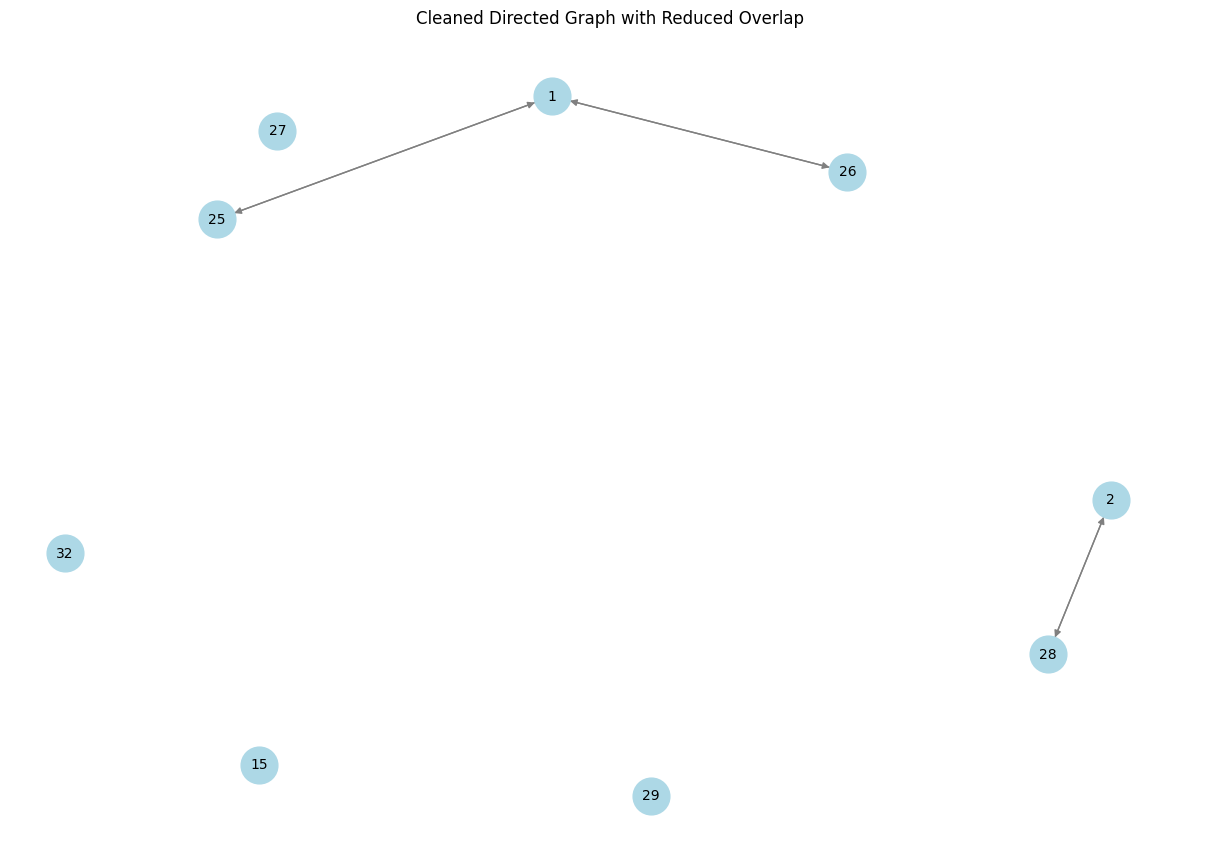

In [8]:
lift1 = {
    1:[25, 26],
    2:[28],
    15: [],
    25: [1],
    26: [1],
    27: [],
    28: [2],
    29: [],
    32: [],
    }

# Step 2: Create a directed graph
lift1_clean = dedup_edges(lift1)
H = nx.DiGraph(lift1_clean)

# Step 3: Create a layout to reduce overlapping
pos = nx.spring_layout(H, k=2, iterations=100, seed=42)  # 'k' adjusts spacing

# Step 4: Plot with matplotlib
plt.figure(figsize=(12, 8))
nx.draw(H, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Cleaned Directed Graph with Reduced Overlap")
plt.tight_layout()
plt.show()

/var/folders/dk/6t0bvj8n45q61w7_l1c3tqn00000gn/T/ipykernel_93896/3967508739.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


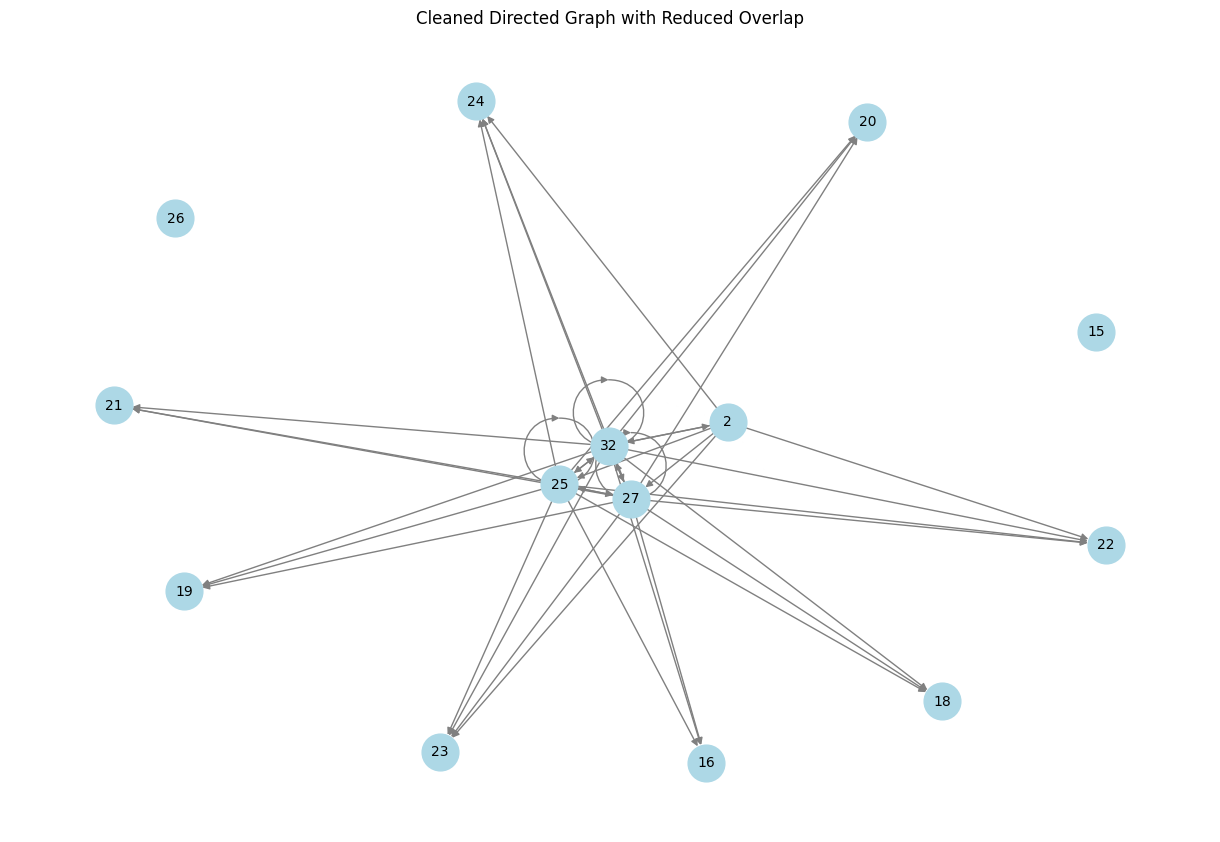

In [9]:
lift2 = {
    2: [22,23,24,25,27,32],
    15: [],
    25:[16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 32],
    26:[],
    27:[16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 32],
    32:[2,16,18,19,20,21,22,23,24,25,27,32]
    }

# Step 2: Create a directed graph
lift2_clean = dedup_edges(lift2)
H = nx.DiGraph(lift2_clean)

# Step 3: Create a layout to reduce overlapping
pos2 = nx.spring_layout(H, k=2, iterations=100, seed=42)  # 'k' adjusts spacing

# Step 4: Plot with matplotlib
plt.figure(figsize=(12, 8))
nx.draw(H, pos2, with_labels=True, node_size=700, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Cleaned Directed Graph with Reduced Overlap")
plt.tight_layout()
plt.show()

/var/folders/dk/6t0bvj8n45q61w7_l1c3tqn00000gn/T/ipykernel_93896/3852901848.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


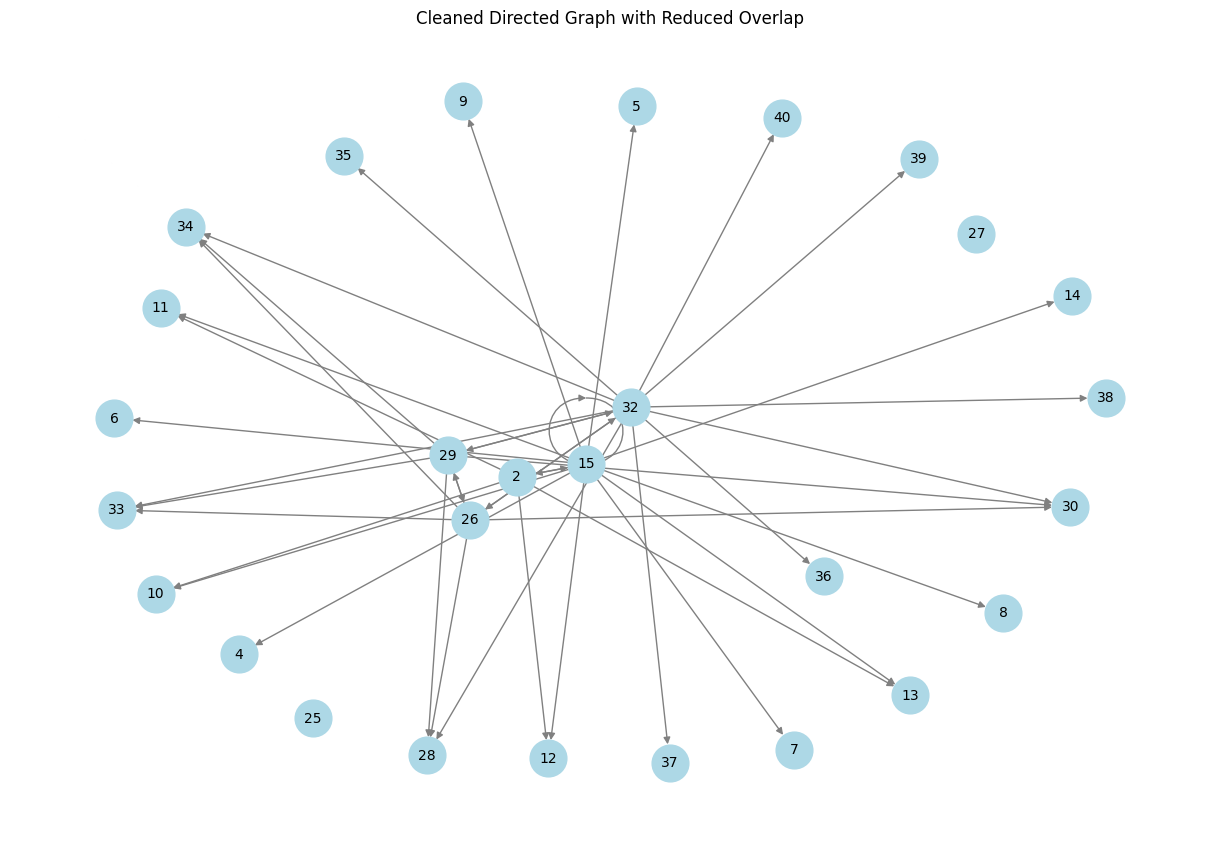

In [10]:

lift3 = {
    2: [10, 11, 12, 13, 13, 15],
    15: [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    25: [],
    26: [28, 29, 30, 32, 33, 34],
    27: [],
    29: [26, 28, 30, 32, 33, 34],
    32: [26, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40]
}

# Step 2: Create a directed graph
lift3_clean = dedup_edges(lift3)
H = nx.DiGraph(lift3_clean)

# Step 3: Create a layout to reduce overlapping
pos = nx.spring_layout(H, k=2, iterations=100, seed=42)  # 'k' adjusts spacing

# Step 4: Plot with matplotlib
plt.figure(figsize=(12, 8))
nx.draw(H, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Cleaned Directed Graph with Reduced Overlap")
plt.tight_layout()
plt.show()

/var/folders/dk/6t0bvj8n45q61w7_l1c3tqn00000gn/T/ipykernel_93896/161867938.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


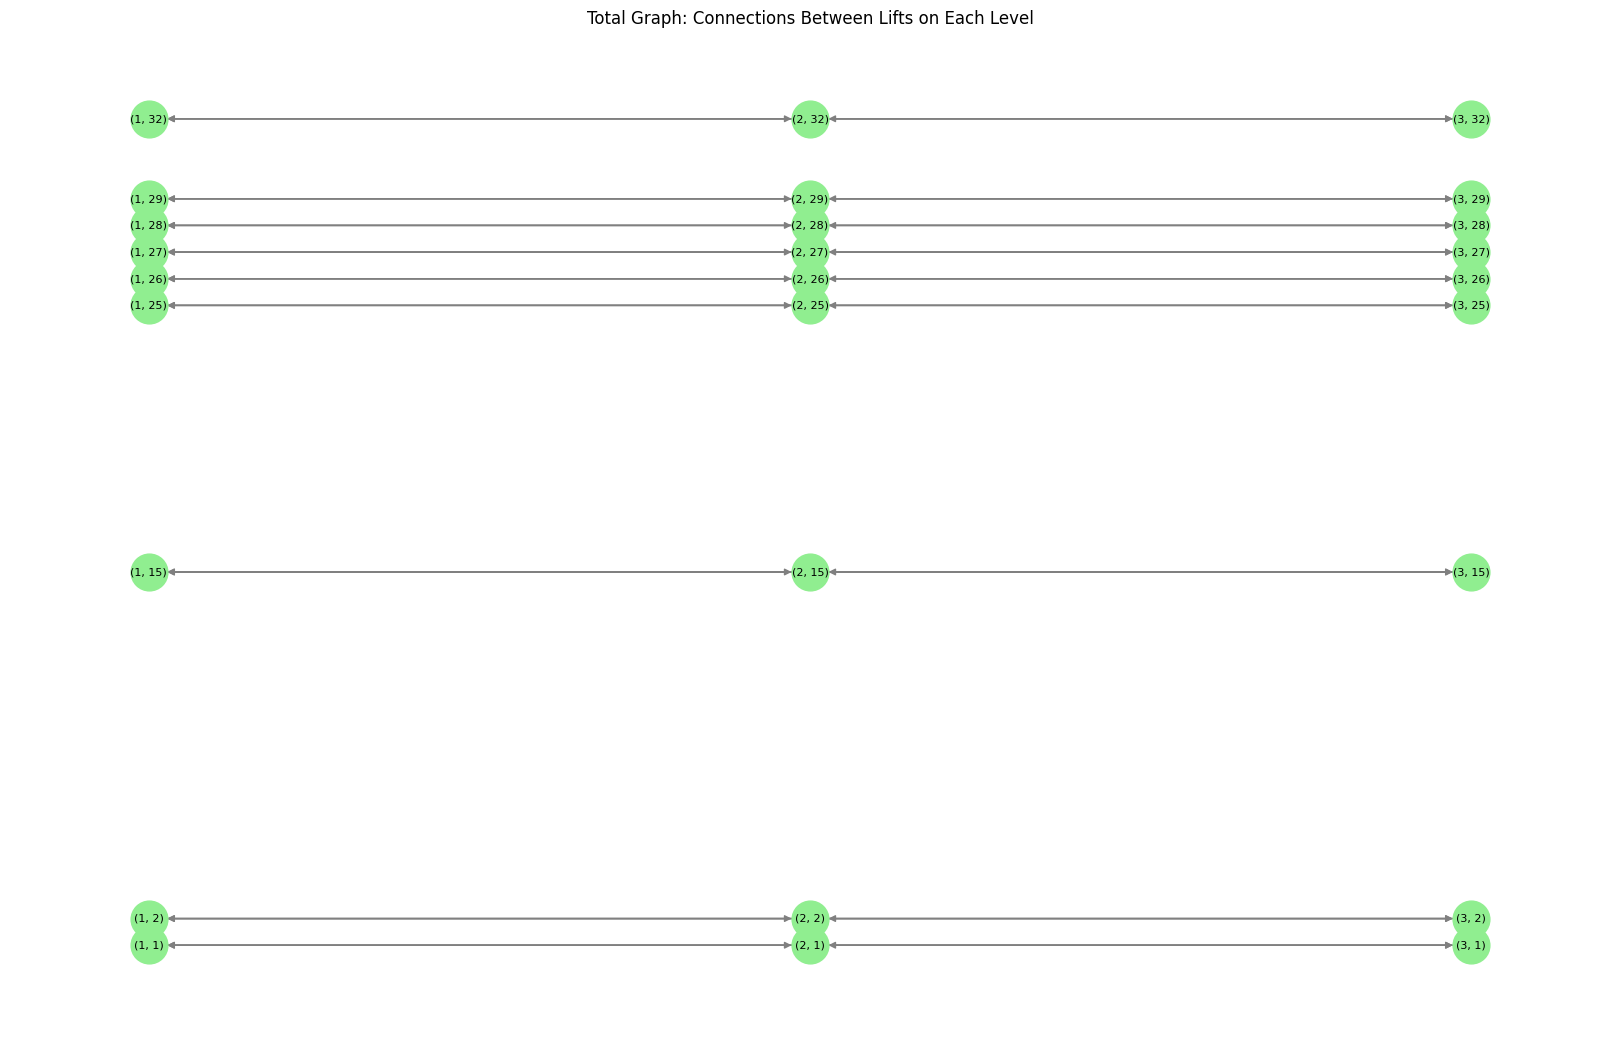

In [11]:
# ...existing code...

# Step 1: Gather all unique levels from all lifts
levels = set(lift1.keys()) | set(lift2.keys()) | set(lift3.keys())

# Step 2: Create nodes for each lift at each level
lifts = [1, 2, 3]
nodes = [(lift, level) for lift in lifts for level in levels]

# Step 3: Create edges between lifts at the same level (both directions)
edges = []
for level in levels:
    for i in lifts:
        for j in lifts:
            if i != j:
                edges.append(((i, level), (j, level)))

# Step 4: Build the graph
total = nx.DiGraph()
total.add_nodes_from(nodes)
total.add_edges_from(edges)

# Step 5: Plot the graph
plt.figure(figsize=(16, 10))
# Position nodes by level (y) and lift (x)
pos = {(lift, level): (lift, level) for (lift, level) in nodes}
nx.draw(total, pos, with_labels=True, node_size=700, node_color="lightgreen", font_size=8, edge_color="gray")
plt.title("Total Graph: Connections Between Lifts on Each Level")
plt.xlabel("Lift Number")
plt.ylabel("Level")
plt.tight_layout()
plt.show()
# ...existing code...

/var/folders/dk/6t0bvj8n45q61w7_l1c3tqn00000gn/T/ipykernel_93896/240636983.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


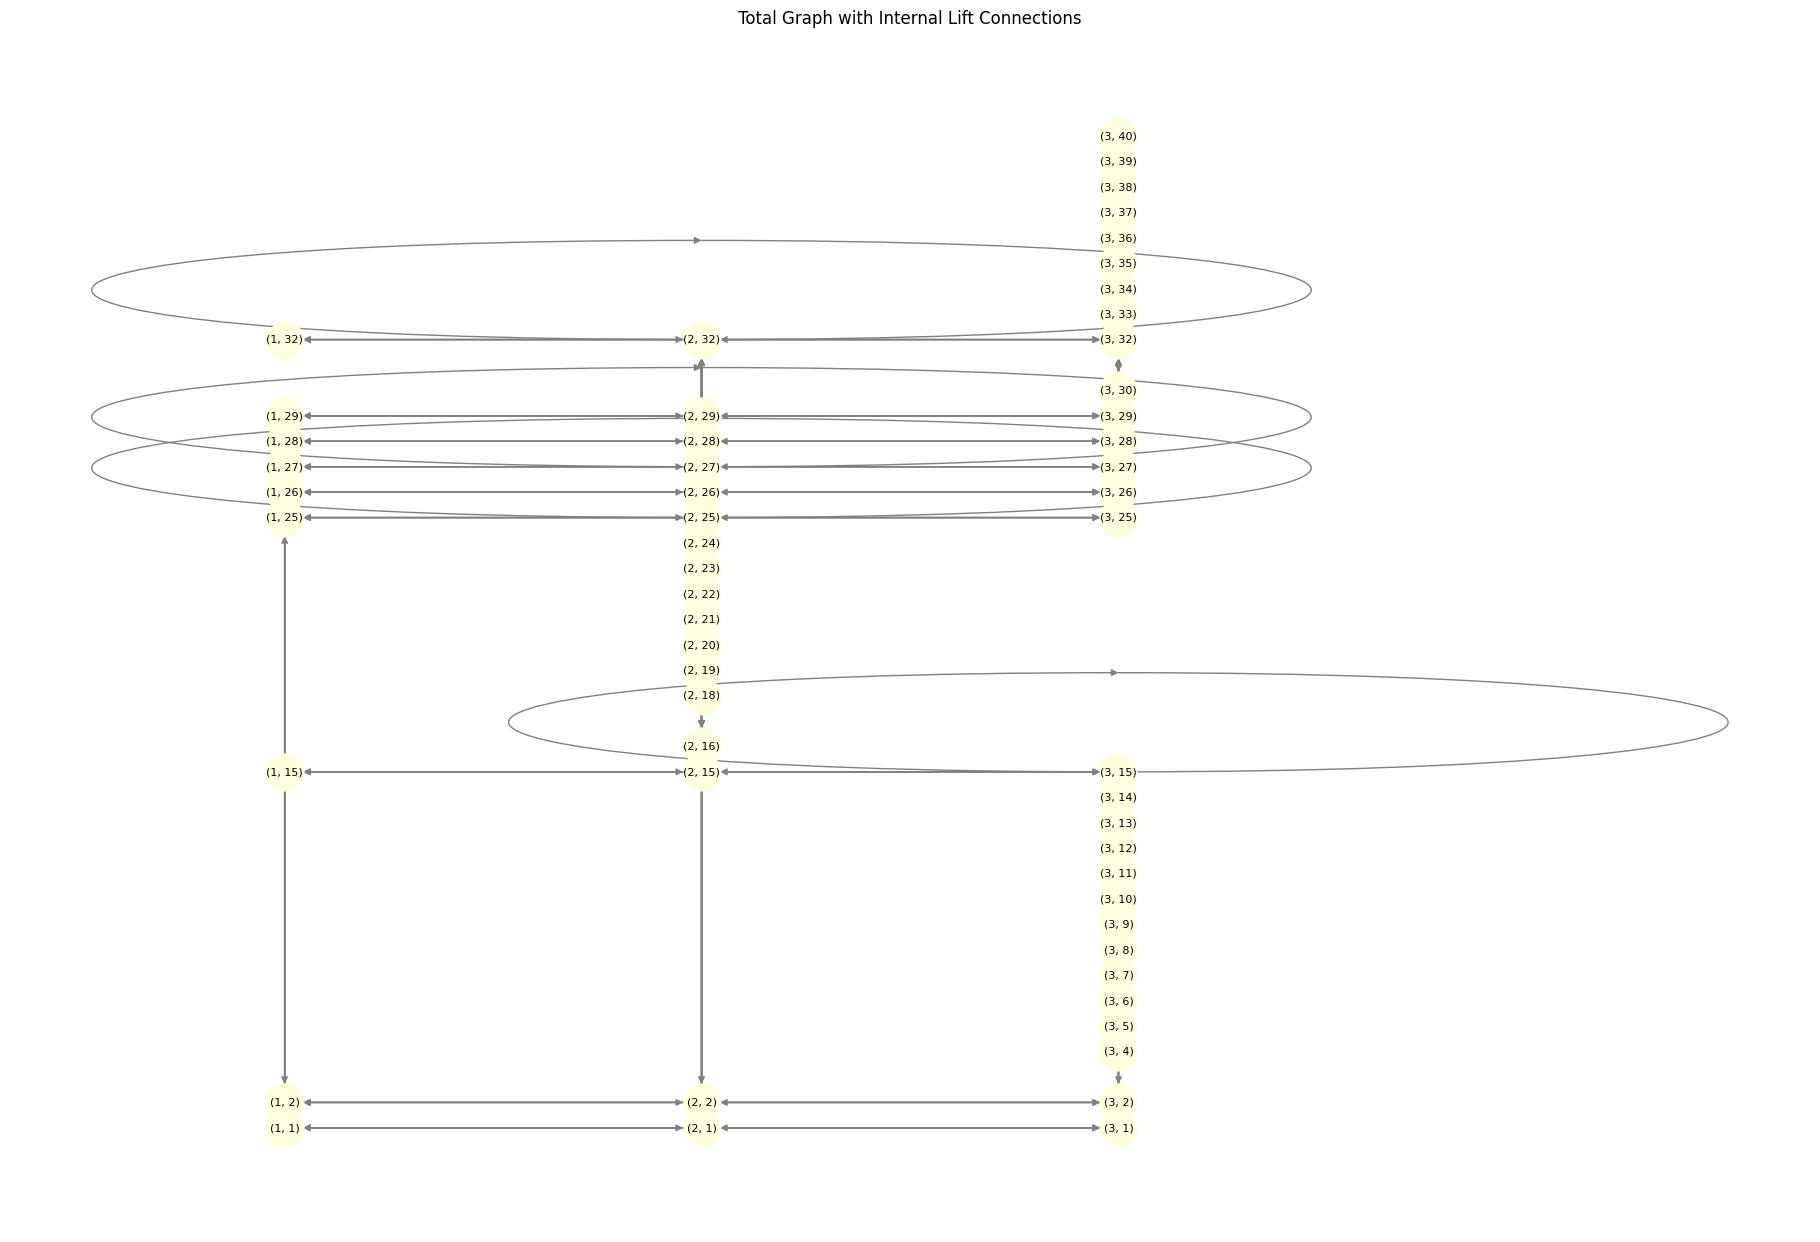

In [12]:
# Extend the total graph with internal lift connections

# Add edges for lift1
for from_level, to_levels in lift1.items():
    for to_level in to_levels:
        total.add_edge((1, from_level), (1, to_level))

# Add edges for lift2
for from_level, to_levels in lift2.items():
    for to_level in to_levels:
        total.add_edge((2, from_level), (2, to_level))

# Add edges for lift3
for from_level, to_levels in lift3.items():
    for to_level in to_levels:
        total.add_edge((3, from_level), (3, to_level))

# Plot the extended graph
plt.figure(figsize=(18, 12))
pos = {(lift, level): (lift, level) for (lift, level) in total.nodes}
nx.draw(total, pos, with_labels=True, node_size=700, node_color="lightyellow", font_size=8, edge_color="gray")
plt.title("Total Graph with Internal Lift Connections")
plt.xlabel("Lift Number")
plt.ylabel("Level")
plt.tight_layout()
plt.show()